## Importação das bibliotecas

In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%0f' % x)

sys.path.append('../')

In [2]:
from src.duplicated_data import count_duplicate

In [3]:
df_consumo_energia_eletrica = pd.read_csv('../data/raw/consumo_energia_eletrica.csv',sep=',')
df_estado_regiao = pd.read_csv('../data/raw/estado_regiao.csv',sep=';', encoding='latin1')


#df_consumo_energia_eletrica.head()
df_estado_regiao.head()


,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [4]:
df_estado_regiao.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [5]:
count_duplicate(dataframe=df_consumo_energia_eletrica)

df_consumo_energia_eletrica = df_consumo_energia_eletrica.drop_duplicates()

count_duplicate(dataframe=df_consumo_energia_eletrica)

foram encontrados 1017 dados duplicados
foram encontrados 0 dados duplicados


In [6]:
df_consumo_energia_eletrica.describe()
#df_estado_regiao.describe()


,ano,mes,numero_consumidores,consumo
count,38880.000000,38880.000000,25920.000000,38880.000000
mean,2013.500000,6.500000,682303.377199,611732.006687
std,5.766355,3.452097,1839311.687366,1208066.849193
min,2004.000000,1.000000,52.000000,354.000000
25%,2008.750000,3.750000,18956.500000,85476.000000
50%,2013.500000,6.500000,108174.500000,221062.000000
75%,2018.250000,9.250000,442412.000000,596699.000000
max,2023.000000,12.000000,19201264.000000,12809742.000000


### Merging datasets

In [7]:
merged_datasets = pd.merge(df_consumo_energia_eletrica,
                           df_estado_regiao,
                            how='inner',
                            left_on='sigla_uf',
                            right_on='sigla')

dropedNaN = merged_datasets.dropna()

dropedNaN.to_csv('../data/processed/dados_tratados.csv', 
                 sep=';', 
                 encoding='latin1'
                 )

dropedNaN.head()


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,sigla,estado,regiao,pais
648,2004,1,RN,Outros,40857.000000,69617,20,RN,Rio Grande do Norte,Nordeste,Brasil
649,2004,1,SP,Outros,311650.000000,937538,25,SP,São Paulo,Sudeste,Brasil
650,2004,1,MS,Outros,56881.000000,67601,12,MS,Mato Grosso do Sul,Centro-Oeste,Brasil
651,2004,1,SC,Outros,226165.000000,209380,24,SC,Santa Catarina,Sul,Brasil
652,2004,1,RJ,Outros,70634.000000,416128,19,RJ,Rio de Janeiro,Sudeste,Brasil


In [8]:
colunas_ausentes = merged_datasets.columns[merged_datasets.isnull().any()] 

print("Colunas com dados ausentes:", colunas_ausentes)
 

Colunas com dados ausentes: Index(['numero_consumidores'], dtype='object')


# Perguntas

##### 1 Após o tratamento dos dados responda as seguintes questões: Qual é a média de consumo elétrico do estado de Minas Gerais para o tipo de consumo residencial entre todos os anos?

In [9]:
processed_dataset = pd.read_csv('../data/processed/dados_tratados.csv',sep=';', encoding='latin1')

processed_dataset.tail()

filter = (processed_dataset['sigla_uf'] == 'MG') & (processed_dataset['tipo_consumo'] == 'Residencial')

data = processed_dataset[filter]

consupution_media = data['consumo'].mean()

print(f"Media de consumo: {consupution_media:.2f}")


Media de consumo: 824152.16


##### 2 Qual estado apresentou o maior consumo de energia elétrica no setor Industrial no ano de 2019?

In [10]:
filter = (processed_dataset['ano'] == 2019) & (processed_dataset['tipo_consumo'] == 'Residencial')

data = processed_dataset[filter]

data.groupby('sigla_uf').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        )

C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\588776357.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.groupby('sigla_uf').agg(


,consupution_sum
sigla_uf,
SP,41149730
RJ,13270194
MG,11321944
RS,9044948
PR,7737345
BA,7341860
SC,6101612
PE,5164197
GO,5115413


<Axes: xlabel='sigla_uf', ylabel='consumo'>

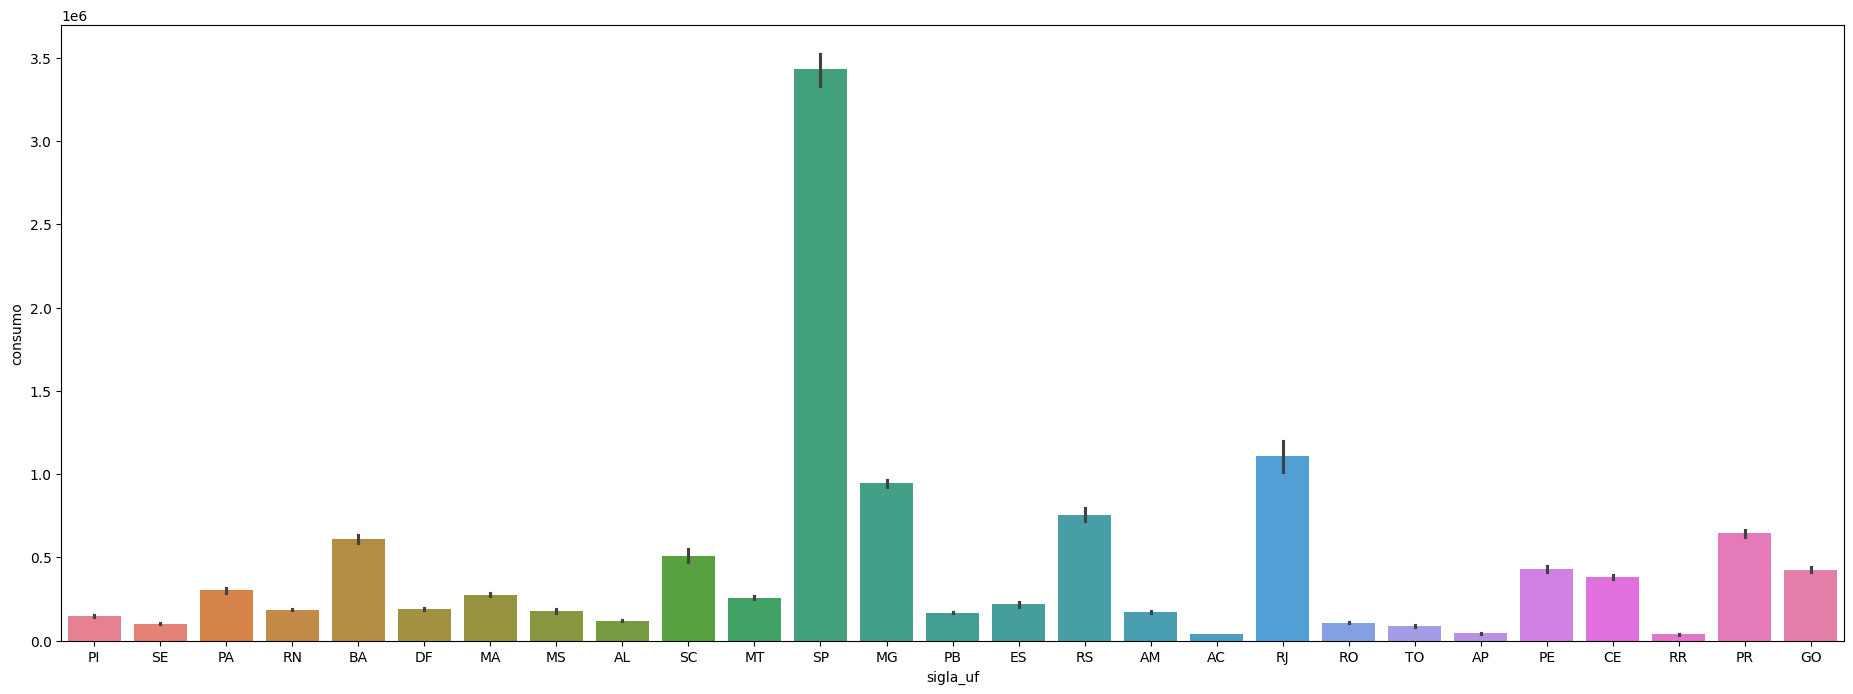

In [11]:
plt.figure(figsize=(23,8))
sns.barplot(
            data=data,
            x='sigla_uf',
            y='consumo',
            hue='sigla_uf'
            )

##### 3 Crie um gráfico de barras exibindo as médias de consumo residencial e destaque os cinco estados com as maiores médias. Certifique-se de ordenar os resultados de forma decrescente, do maior para o menor.

In [12]:
filter = (processed_dataset['tipo_consumo'] == 'Residencial')

data = processed_dataset[filter]

max_sum_consumo = processed_dataset.groupby('sigla_uf').agg(
    average_cons=('consumo', 'mean')
)

headFive = max_sum_consumo.sort_values(by='average_cons', ascending=False).head(5)

           average_cons
sigla_uf               
SP       2631808.197917
MG       1106188.364583
RJ        768140.057292
PR        588555.683333
RS        575600.895833


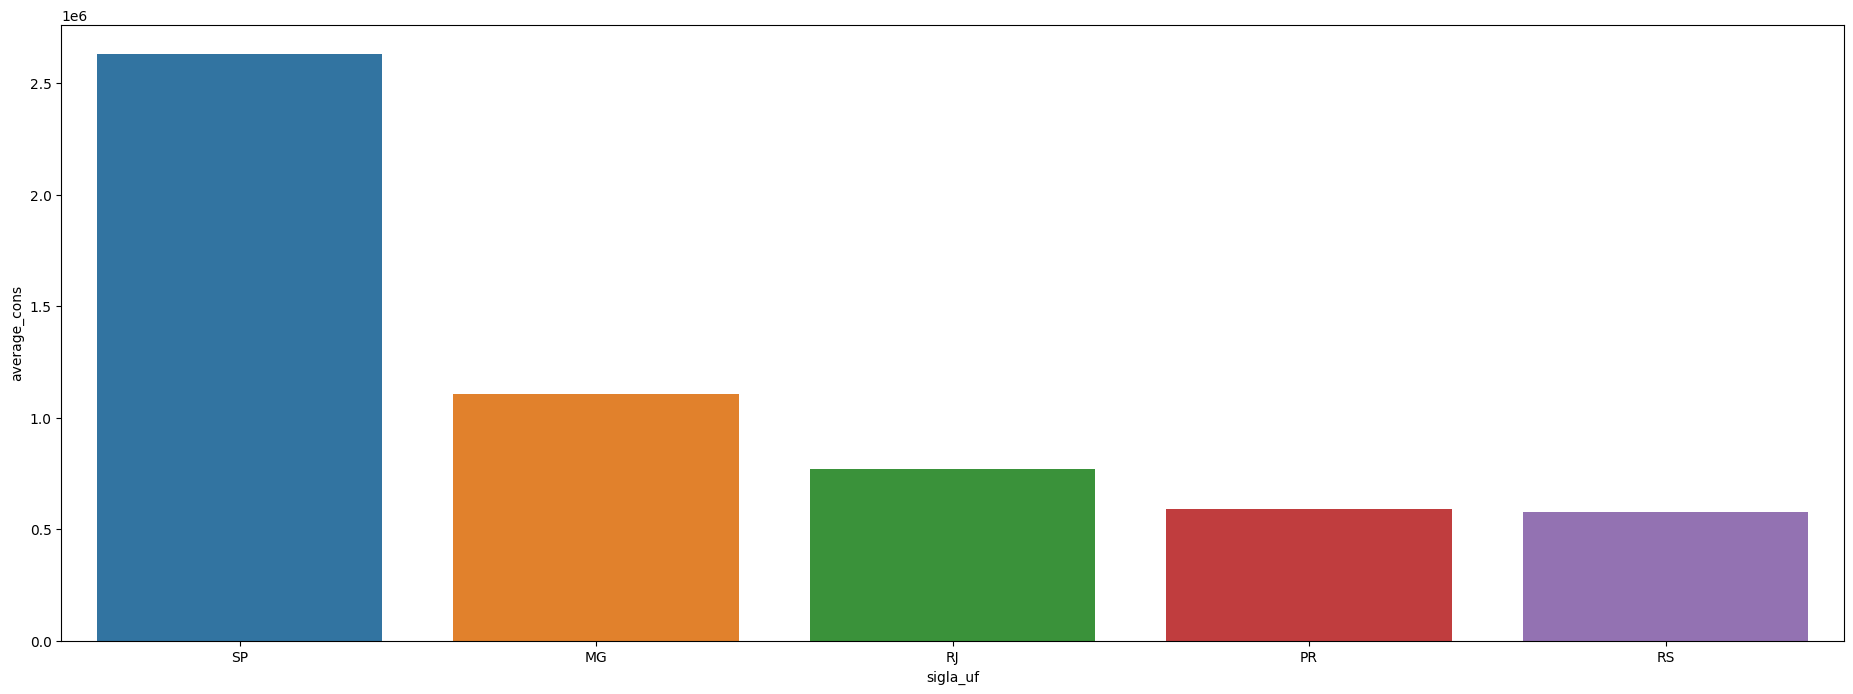

In [13]:
plt.figure(figsize=(23,8))
sns.barplot(
            data=headFive,
            x='sigla_uf',
            y='average_cons',
            hue='sigla_uf'
            )
print(headFive)

##### 4 Crie um gráfico de barras exibindo a soma do consumo de energia agrupados por tipo de consumo existente na base dados para o estado de São Paulo. Certifique-se de ordenar os resultados de forma decrescente, do maior para o menor.

C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\2225929953.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped_data =  data.groupby('tipo_consumo').agg(


           average_cons
sigla_uf               
SP       2631808.197917
MG       1106188.364583
RJ        768140.057292
PR        588555.683333
RS        575600.895833


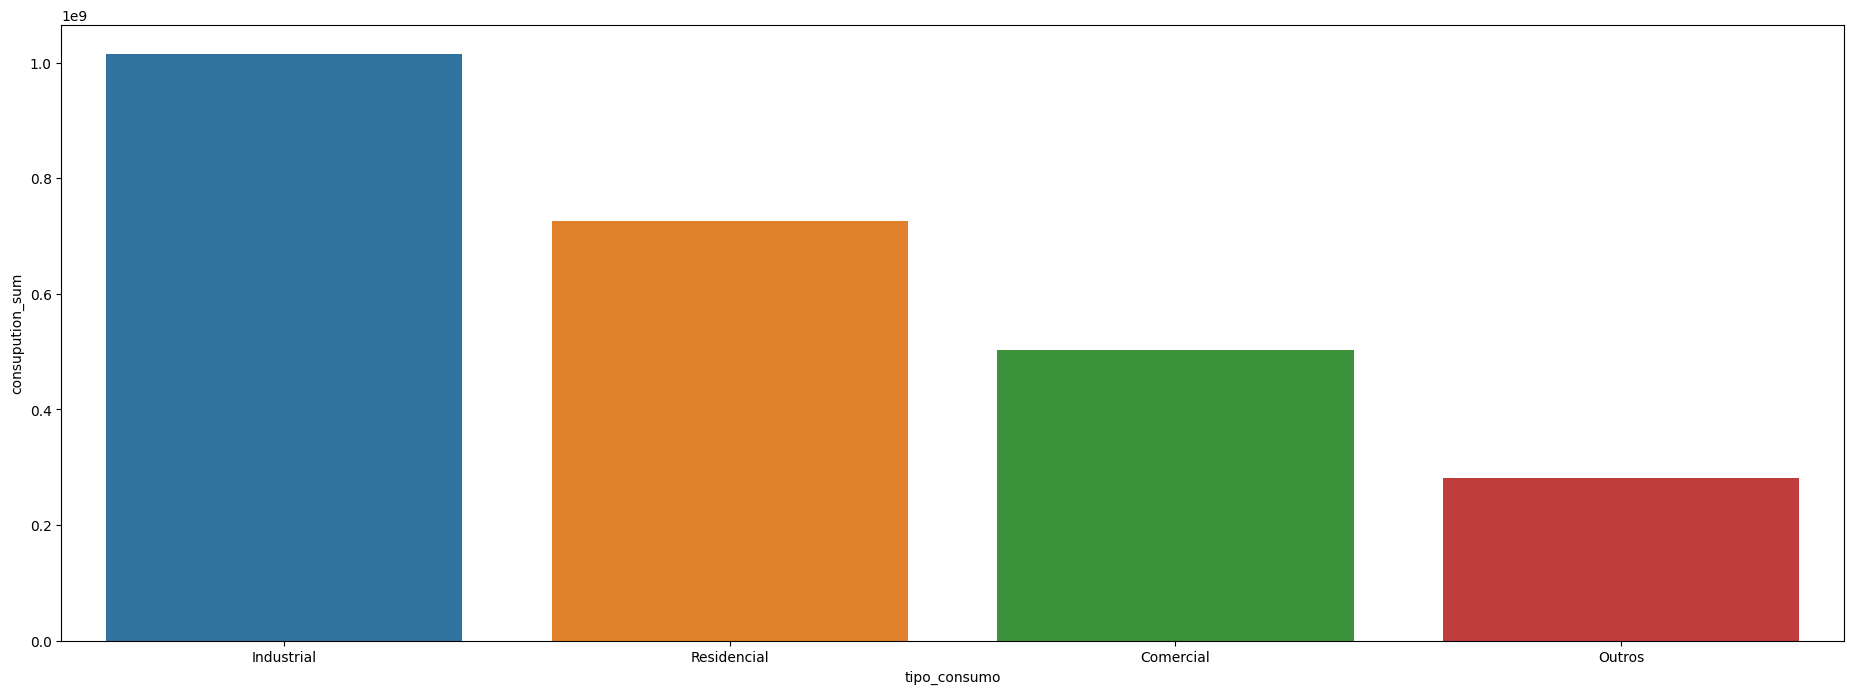

In [14]:
filter = (processed_dataset['sigla_uf'] == 'SP')

data = processed_dataset[filter]

grouped_data =  data.groupby('tipo_consumo').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        )

plt.figure(figsize=(23,8))
sns.barplot(
            data=grouped_data,
            x='tipo_consumo',
            y='consupution_sum',
            hue='tipo_consumo'
            )
print(headFive)

##### 5 Qual ano que obteve o maior consumo?


In [15]:
processed_dataset.groupby('ano').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        ).head(1)

C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\2313352680.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  processed_dataset.groupby('ano').agg(


,consupution_sum
ano,
2023,531012116


##### 6 Qual foi o estado que obteve menor consumo no ano de 2020?

In [16]:
filter = (processed_dataset['ano'] == 2020)

data = processed_dataset[filter]

data.groupby('sigla_uf').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=True
        ).head(1)

C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\4167748664.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.groupby('sigla_uf').agg(


,consupution_sum
sigla_uf,
RR,975286


##### 7 Calcule a amplitude dos dados de consumo de energia elétrica para o ano de 2019. 

In [17]:
filter = (processed_dataset['ano'] == 2019)

consumption_data = processed_dataset[filter]['consumo']

max_consuption_value = max(consumption_data)
min_consuption_value = min(consumption_data)

amplitude = max_consuption_value - min_consuption_value

amplitude

4136720

##### 8 Qual é a média do consumo residencial de todos os consumidores da região nordeste no ano de 2019? Realize o arredondamento semcasas decimais. Round()

In [18]:
filter = (processed_dataset['ano'] == 2019) & (processed_dataset['regiao'] == 'Nordeste') & (processed_dataset['tipo_consumo'] == 'Residencial')

data = processed_dataset[filter]

north_east_consupution_media = data['consumo'].mean().round()


print(f"Media de consumo: {north_east_consupution_media:.2f}")


Media de consumo: 269220.00


##### 9 Crie um gráfico de linhas onde o eixo X representa a os anos e o eixo Y representa o consumo de energia agrupados por tipo de consumo. Em seguida escolha a melhor representação.

<Axes: xlabel='ano', ylabel='consumo'>

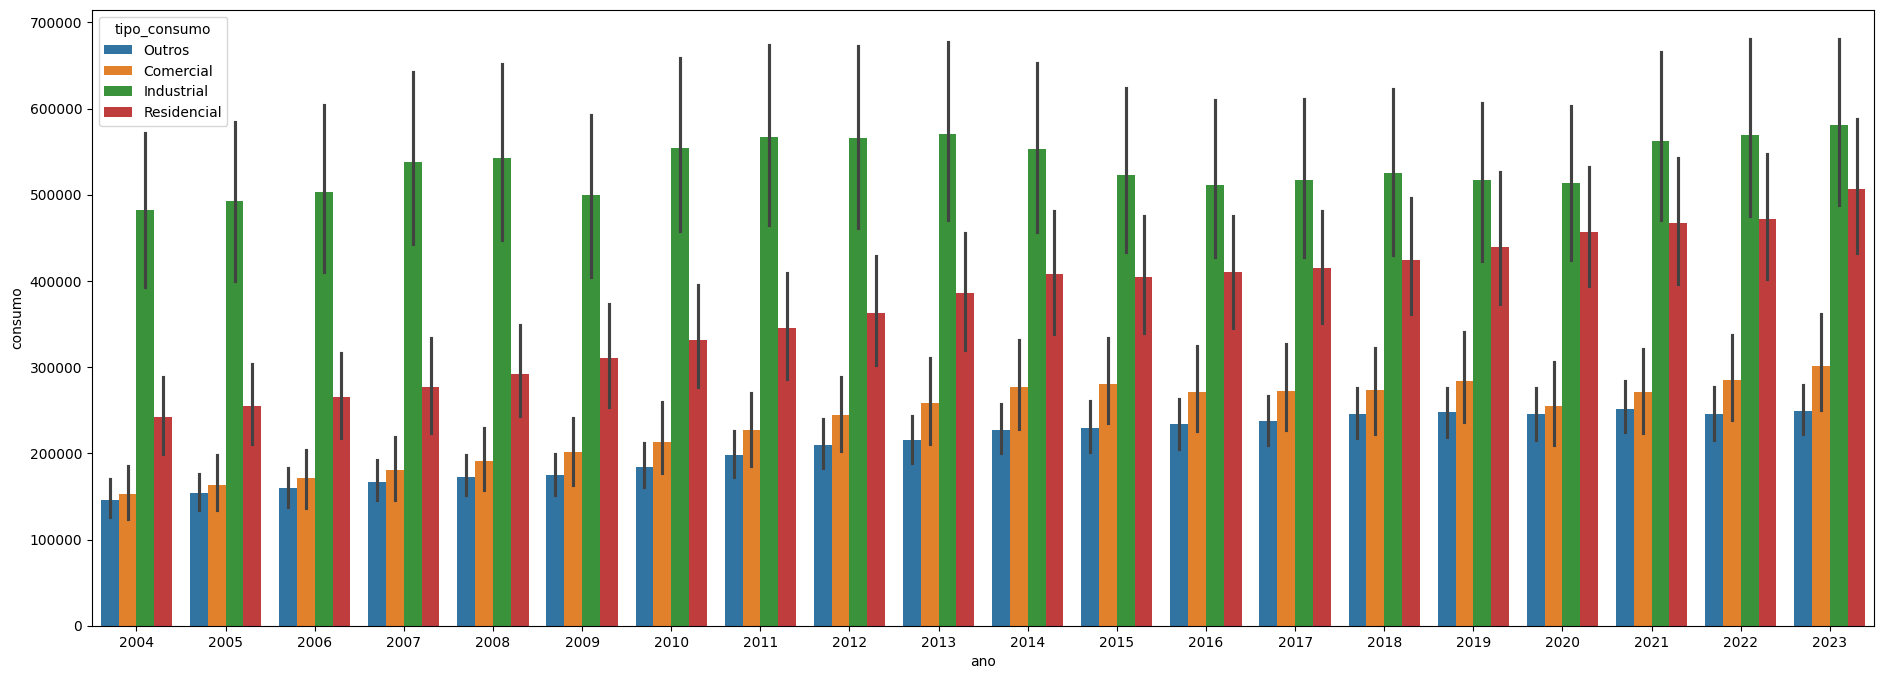

In [19]:
plt.figure(figsize=(23,8))
sns.barplot(data= processed_dataset,
                x='ano',
                y='consumo',
                hue='tipo_consumo')

##### 10 Calcule a média de consumo agrupados por ano e região e em seguida responda: Em qual ano o consumo de energia elétrica da região Nordeste foi mais alto que o Centro Oeste? Escolha uma das alternativas abaixo.

In [20]:
average_region = processed_dataset.groupby(['regiao','ano']).agg(
    media = ('consumo', 'mean')
)

nordeste = average_region.query("regiao == 'Nordeste'")

centro_oeste = average_region.query("regiao == 'Centro-Oeste'")

comparsion = nordeste.merge(centro_oeste, on='ano', suffixes=('_nordeste', '_centro_oeste'))

comparsion['year_grather_than'] = comparsion['media_nordeste'] >  comparsion['media_centro_oeste']

comparsion

,media_nordeste,media_centro_oeste,year_grather_than
ano,,,
2004,124504.481481,100102.505208,True
2005,131722.402778,105432.052083,True
2006,136713.442130,107769.401042,True
2007,144368.166667,114746.552083,True
2008,150701.784722,123189.578125,True
2009,151027.231481,129668.609375,True
2010,164807.743056,137033.750000,True
2011,166467.141204,146898.552083,True
2012,175024.078704,159988.166667,True


##### 11 Qual foi o maior consumo de energia na época de Copa do Mundo por estado?

In [21]:
world_cup_data = processed_dataset.query("  (ano == 2006 and mes >= 6 and mes <= 7) \
                                       or (ano == 2010 and mes >= 6 and mes <= 7) \
                                       or (ano == 2014 and mes >= 6 and mes <= 7) \
                                       or (ano == 2018 and mes >= 6 and mes <= 7) \
                                       or (ano == 2022 and mes >= 11 and mes <= 12)" 
                                       )

world_cup_data.groupby('sigla_uf').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        )


C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\3709386265.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  world_cup_data.groupby('sigla_uf').agg(


,consupution_sum
sigla_uf,
SP,104592464
MG,44545278
RJ,29243518
PR,23414349
RS,22553463
BA,19093087
SC,17932768
PA,14831162
GO,11395112


##### 12 Qual foi a média de consumo de energia nos anos de Covid-19 por estado?

In [22]:
covid_filter = processed_dataset.query("ano == 2020 and mes >= 2 or ano == 2021 or ano == 2022 and mes <= 4")

covid_filter.groupby('sigla_uf').agg(
    consupution_sum = ('consumo','mean')
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        )


,consupution_sum
sigla_uf,
SP,2799902.472222
MG,1219084.259259
RJ,801624.481481
PR,712937.203704
RS,632420.472222
SC,573254.685185
BA,532351.638889
PA,423534.648148
GO,354764.203704


##### 13 Qual estado teve maior consumo de energia nos anos de Covid-19?

In [23]:
covid_filter = processed_dataset.query("ano == 2020 and mes >= 2 or ano == 2021 or ano == 2022 and mes <= 4")

covid_filter.groupby('sigla_uf').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        ).head(1)


C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\1599861812.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  covid_filter.groupby('sigla_uf').agg(


,consupution_sum
sigla_uf,
SP,302389467


##### 14 Qual foi o estado  que consumiu mais energia na época de Olimpiadas e Paralimpíadas?

In [24]:
olimpic_data = processed_dataset.query("ano == 2016 and mes >= 8 and mes <= 9")

olimpic_data.groupby('sigla_uf').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        ).head(5)


C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\1578222446.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  olimpic_data.groupby('sigla_uf').agg(


,consupution_sum
sigla_uf,
SP,20882634
MG,9265662
RJ,6258156
PR,4768034
RS,4648233


##### 15 Quais são os 5 estados com maior consumo de energia na época do Carnaval?

In [25]:
carnival_data = processed_dataset.query("((ano == 2011 or ano == 2014) and mes == 3) \
                                         or ((ano == 2017 or ano == 2022) and (mes == 2 or mes == 3)) \
                                         or (ano != 2011 and ano != 2014 and ano != 2017  and ano != 2022 ) \
                                         and mes == 2")

carnival_data.groupby('sigla_uf').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        )


C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\3133669270.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  carnival_data.groupby('sigla_uf').agg(


,consupution_sum
sigla_uf,
SP,232386250
MG,94498407
RJ,72418453
RS,55721756
PR,53599026
SC,43664251
BA,40992456
PA,30383975
GO,23450346


##### 16 Qual região tem o maior numero de consumidores

In [28]:
max_sum_consumo = processed_dataset.groupby('regiao').agg(
    max_cons=('consumo', sum)
)

headOne = max_sum_consumo.sort_values(by='max_cons', ascending=False).head(1)

headOne

C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\3073080267.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  max_sum_consumo = processed_dataset.groupby('regiao').agg(


,max_cons
regiao,
Sudeste,4518515077


##### 17 Qual região tem o menor numero de consumidores

In [31]:
min_sum_consumo = processed_dataset.groupby('regiao').agg(
    max_cons=('consumo', sum)
)

headTail = max_sum_consumo.sort_values(by='max_cons', ascending=False).tail(1)

headTail

C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\3845704176.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  min_sum_consumo = processed_dataset.groupby('regiao').agg(


,max_cons
regiao,
Norte,596647389


##### 18 Qual região tem o maior consumo de energia no mês do Natal

In [48]:
christmas_data = processed_dataset.query("mes == 12")

christmas_data.groupby('regiao').agg(
    consupution_sum = ('consumo',sum)
    ).sort_values(
        by = 'consupution_sum',
        ascending=False
        ).head(1)

C:\Users\pedro\AppData\Local\Temp\ipykernel_17272\491576060.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  christmas_data.groupby('regiao').agg(


,consupution_sum
regiao,
Sudeste,382762094
